In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


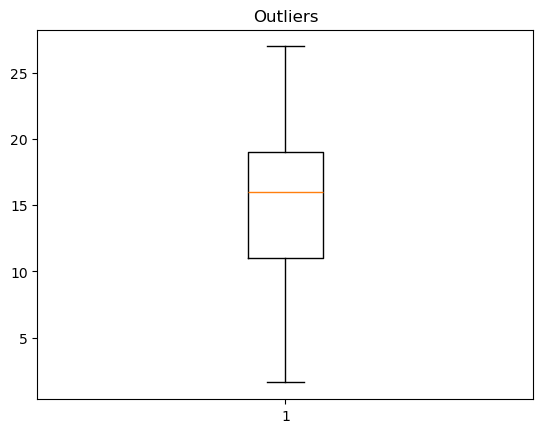

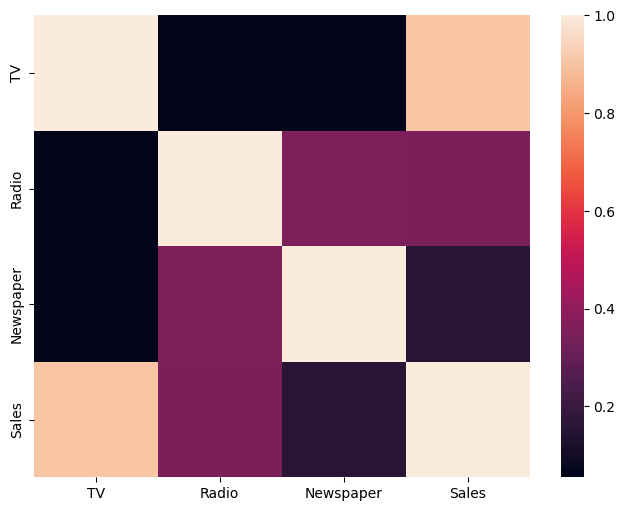

In [4]:
plt.boxplot(df['Sales'])
plt.title("Outliers")
plt.show()

print("")

cor = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor)
plt.show()


In [5]:
X=df[['TV', 'Radio', 'Newspaper']].values 
y=df['Sales'].values.reshape(-1,1)
m = len(y)

In [6]:
X = np.c_[np.ones((m, 1)), X]

In [7]:
s = int(0.8 * m)
X_train, X_test = X[:s], X[s:]
y_train, y_test = y[:s], y[s:]

In [8]:
def gradient_descent(X, y, learning_rate=1e-6, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for i in range(iterations):
        error = X @ theta - y
        gradient = (1/m) * X.T @ error
        theta -= learning_rate * gradient
    return theta

In [9]:
theta = gradient_descent(X_train, y_train,iterations=2000)


In [10]:
y_pred = X_test @ theta

In [11]:
SS_res = np.sum((y_test - y_pred) ** 2)
SS_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - SS_res / SS_tot
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

In [12]:
print(theta)
print(r2)
print(mse)
print(rmse)
print(mae)

[[0.00271986]
 [0.07222145]
 [0.0770371 ]
 [0.05839907]]
0.6687991673643843
8.954873562463522
2.9924694756109913
2.5836652482175793


r^2 score is 0.6687 which says that the model is giving 66% of variation in the sales prediction. the model's performance is good,but can be improved by altering the learning rate,removing extreme outliers etc..

In [14]:
new_data = pd.DataFrame({
    'TV': [150, 230, 50, 300, 100],
    'Radio': [22, 44, 18, 40, 10],
    'Newspaper': [12, 30, 20, 80, 5]
})

new_pred=theta[0]+(new_data @ theta[1:])
print(new_pred)

           0
0  13.231542
1  21.755257
2   6.168441
3  29.422563
4   8.287231


--------------------------------------------------------------------------        
                          2ND QUESTION

In [16]:
df = pd.read_csv("Housing.csv")

In [17]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [18]:
features = ['area', 'bedrooms', 'bathrooms', 'parking', 'mainroad', 'airconditioning', 'furnishingstatus']
X_raw = df[features].values
y = df['price'].values.reshape(-1, 1)

In [19]:
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_norm = (X_raw - X_mean) / X_std

In [20]:
X = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))

In [21]:
def grad_descent(X, y, lr=0.01, epochs=3000):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n, 1))
    losses = []

    for i in range(epochs):
        y_pred = X @ theta
        error = y_pred - y
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        losses.append(cost)

        gradient = (1 / m) * (X.T @ error)
        theta -= lr * gradient

    return theta, losses

In [22]:
theta, losses = grad_descent(X, y, lr=0.01, epochs=3000)

In [23]:
y_pred = X @ theta

In [24]:
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

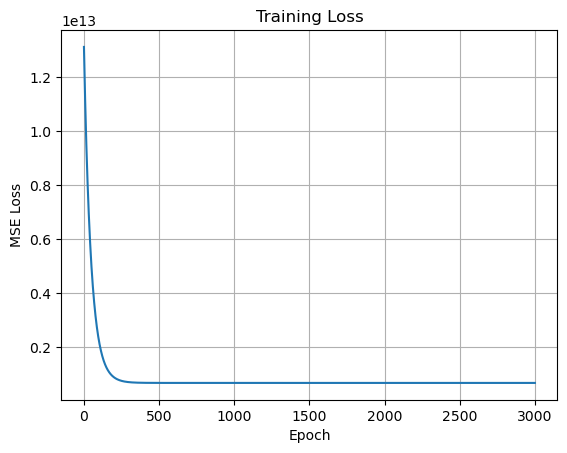

In [25]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

In [26]:
print( theta)
print(r2_score)

[[4766729.24770604]
 [ 558897.83324269]
 [ 246256.42839187]
 [ 598325.86969943]
 [ 217525.98341018]
 [ 243305.04486601]
 [ 479112.12745722]
 [ 208527.57620797]]
0.607843572555222


r^2 score is 0.607 which says that the model is giving 60% of variation in the prices prediction. the model's performance is moderately good.

TO KNOW THE FACTORS AFFECTING THE HOUSE PRICES, WE SHOULD CHECK FOR CORRELATION.

In [29]:
df.corr()['price'].sort_values()

hotwaterheating     0.093073
basement            0.187057
guestroom           0.255517
mainroad            0.296898
furnishingstatus    0.304721
prefarea            0.329777
bedrooms            0.366494
parking             0.384394
stories             0.420712
airconditioning     0.452954
bathrooms           0.517545
area                0.535997
price               1.000000
Name: price, dtype: float64

THE FACTORS AFFECTING PRICES, WILL HAVE HIGH CORRELATION WITH PRICES. SO, FACTORS LIKE area,bathrooms,airconditioning,stories,parking,bedrooms,prefarea AFFECT HOUSE PRICES SIGNIFICANTLY